In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import statsmodels.api as sm

In [15]:
def harmonic_regression(t, y, f, K):
    """
    SKLEARN
    Fit harmonic regression to remove K harmonics of base frequency f.
    Returns: fitted harmonic signal, residual (y - fit), and model
    """
    # Design matrix: sin and cos terms for k = 1 to K
    X = np.column_stack([
        func(2 * np.pi * k * f * t)
        for k in range(1, K+1)
        for func in (np.sin, np.cos)
    ])
    
    # Add intercept
    X = np.column_stack([np.ones(len(t)), X])
    
    # Fit model
    model = LinearRegression(fit_intercept=False).fit(X, y)
    y_fit = model.predict(X)
    residual = y - y_fit
    
    return y_fit, residual, model

In [27]:
def harmonic_regression(t, y, f, K):
    """
    Remove harmonics
    """
    X = np.column_stack([
        func(2 * np.pi * k * f * t)
        for k in range(1, K+1)
        for func in (np.sin, np.cos)
    ])
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    y_fit = model.fittedvalues
    residuals = y - y_fit

    return y_fit, residuals, model

In [28]:
f = 60
t = ts
X = np.column_stack([
    func(2 * np.pi * k * f * t)
    for k in range(1, K+1)
    for func in (np.sin, np.cos)
])
X = sm.add_constant(X)

In [32]:
model = sm.OLS(tester, X)
results = model.fit()
yfit = model.predict(X.T)

first: bias column

second: sine with fundamental freq

third: cosine with fundamental freq

fourth: sine with 2 * fundamental freq

...

In [20]:
# Common data setup
t = np.linspace(0, 1, 1000)
f_base = 5
np.random.seed(0)
y = 1.5 * np.sin(2 * np.pi * f_base * t) + 0.8 * np.cos(2 * np.pi * 2 * f_base * t) + 0.5 * np.random.randn(len(t))

# Design matrix
X = np.column_stack([
    func(2 * np.pi * k * f_base * t)
    for k in range(1, 4)
    for func in (np.sin, np.cos)
])
X_with_intercept = np.column_stack([np.ones(len(t)), X])  # for sklearn
X_sm = sm.add_constant(X)  # for statsmodels

# sklearn
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression(fit_intercept=False).fit(X_with_intercept, y)
fit_sklearn = model_sklearn.predict(X_with_intercept)

# statsmodels
model_sm = sm.OLS(y, X_sm).fit()
fit_sm = model_sm.fittedvalues

# Compare
np.allclose(fit_sklearn, fit_sm)  # Should return True if everything aligns

True

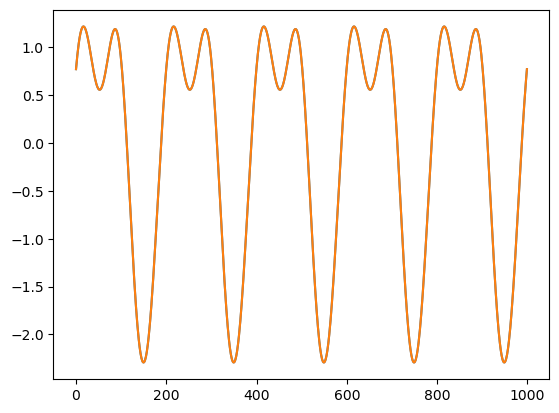

In [21]:
plt.plot(fit_sklearn)
plt.plot(fit_sm)

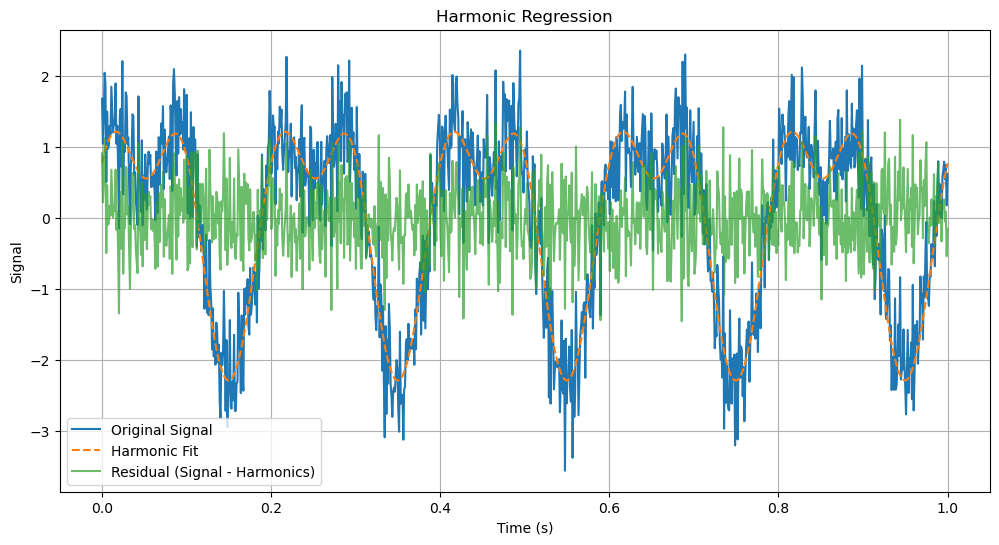

In [28]:
# Simulated signal
np.random.seed(0)
t = np.linspace(0, 1, 1000)  # 1 second sampled at 1 kHz
f_base = 5  # 5 Hz fundamental
add_noise = 0.5 * np.random.randn(len(t))
y = 1.5 * np.sin(2 * np.pi * f_base * t) + 0.8 * np.cos(2 * np.pi * 2 * f_base * t) + add_noise

# Remove first 3 harmonics
y_fit, residual, model = harmonic_regression(t, y, f_base, K=3)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, y, label='Original Signal')
plt.plot(t, y_fit, label='Harmonic Fit', linestyle='--')
plt.plot(t, residual, label='Residual (Signal - Harmonics)', alpha=0.7)
#plt.plot(t, add_noise, label='OG noise')
plt.legend()
plt.title('Harmonic Regression')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.grid(True)
plt.show()


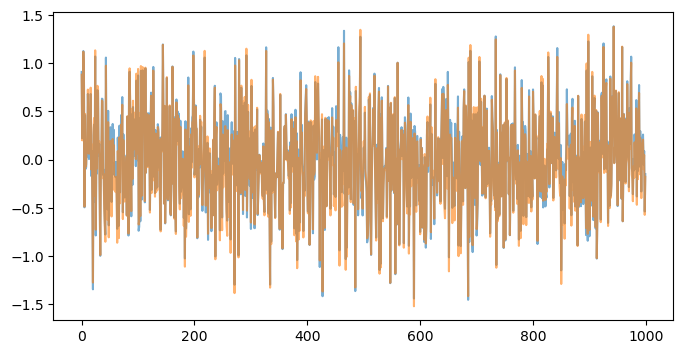

In [9]:
plt.figure(figsize=(8,4))
plt.plot(residual, alpha=0.6)
plt.plot(add_noise, alpha=0.6)